Employee turnover prediction

In [2]:
#required librareris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/archive (2).zip")

In [4]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.shape

(1470, 35)

In [7]:
#remove employenumber .....
pd.set_option('display.max_columns',None)

In [8]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#checking null values

df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                Fals

<Axes: xlabel='count', ylabel='Attrition'>

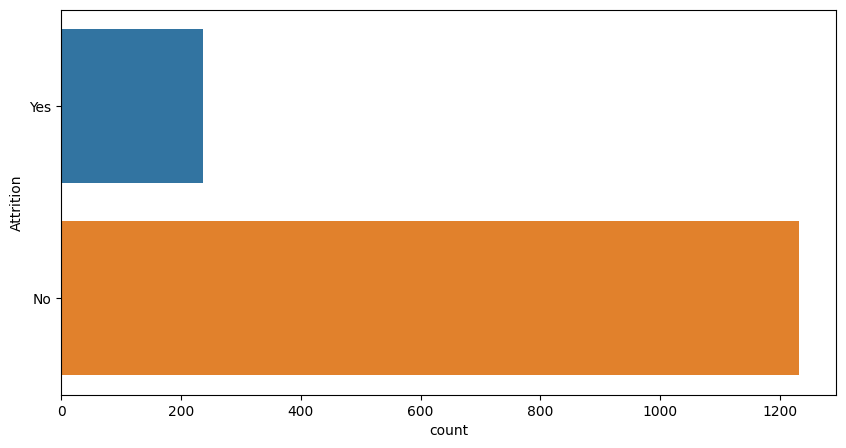

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y ="Attrition",data =df)

<Axes: title={'center': 'department VS Attrition'}, xlabel='Department', ylabel='count'>

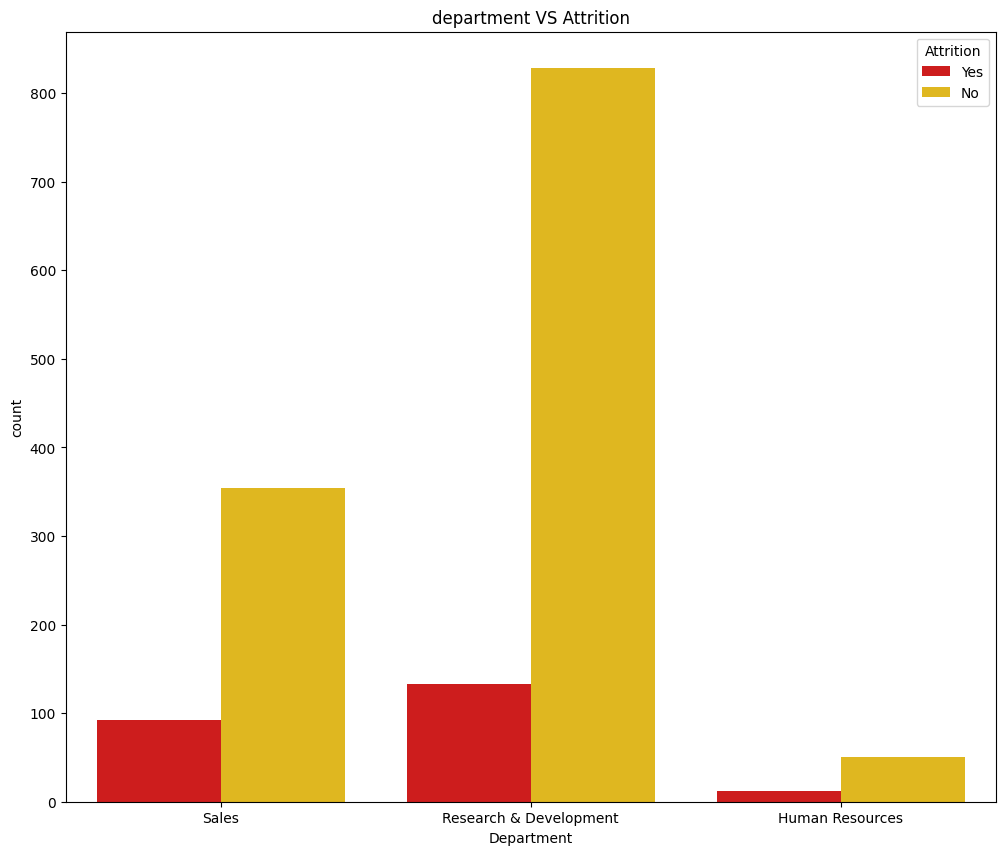

In [16]:
# Department Attriation

plt.figure(figsize =(12,10))
plt.title("department VS Attrition")
sns.countplot(x="Department",hue ="Attrition",data= df ,palette ='hot')

<Axes: title={'center': 'EducationField VS Attrition'}, xlabel='EducationField', ylabel='count'>

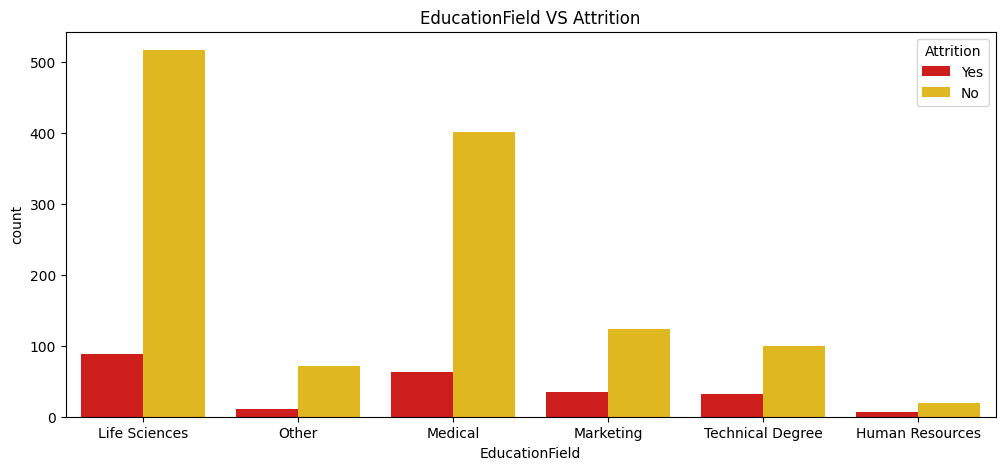

In [17]:
plt.figure(figsize=(12,5))
plt.title("EducationField VS Attrition")
sns.countplot(x="EducationField" ,hue ="Attrition", data=df ,palette ='hot')

<Axes: title={'center': 'JobRole VS Attrition'}, xlabel='JobRole', ylabel='count'>

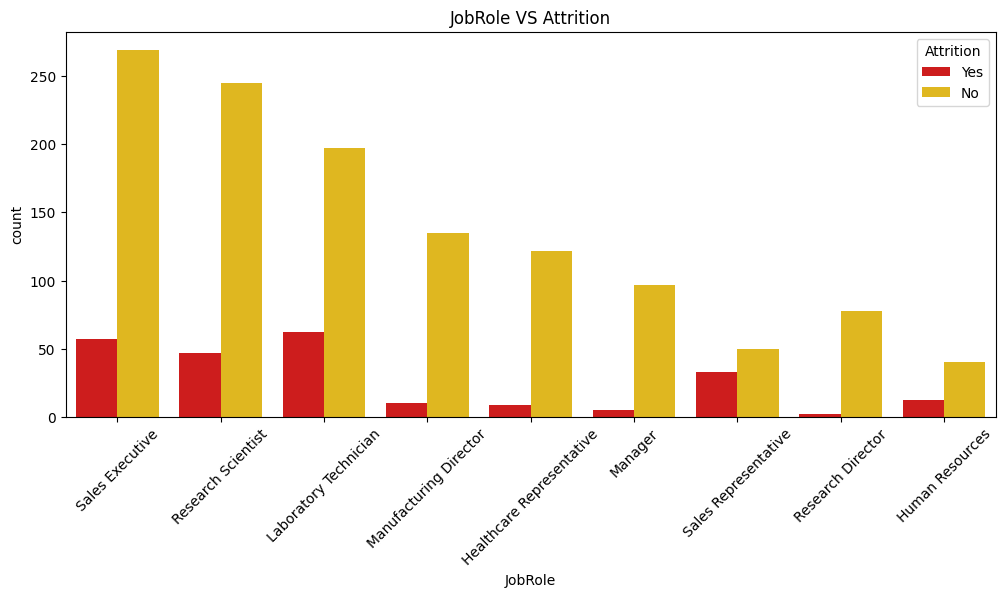

In [20]:
plt.figure(figsize=(12,5))
plt.title("JobRole VS Attrition")
plt.xticks(rotation=45)
sns.countplot(x="JobRole" ,hue="Attrition" ,data =df ,palette ='hot')

<Axes: title={'center': 'GEnder VS Attrition'}, xlabel='Gender', ylabel='count'>

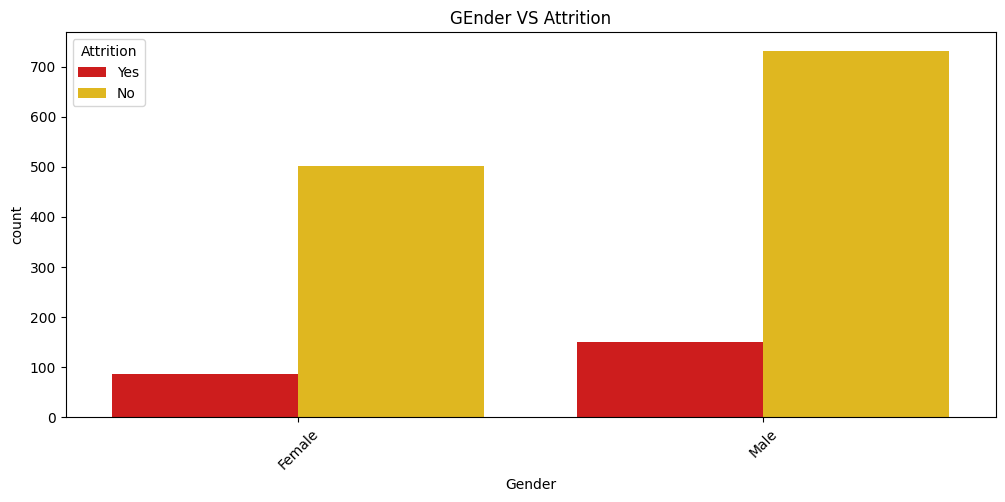

In [23]:
plt.figure(figsize=(12,5))
plt.title("GEnder VS Attrition")
plt.xticks(rotation =45)
sns.countplot(x="Gender" ,hue ="Attrition" ,data =df ,palette ='hot' )

In [24]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [25]:
df['count']=5

In [27]:
df.groupby(["Gender","Attrition"]).agg({"count":"sum"})

count
Gender Attrition       
Female No          2505
       Yes          435
Male   No          3660
       Yes          750

<ipython-input-30-b1489813887b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],hist =False)


<function matplotlib.pyplot.show(close=None, block=None)>

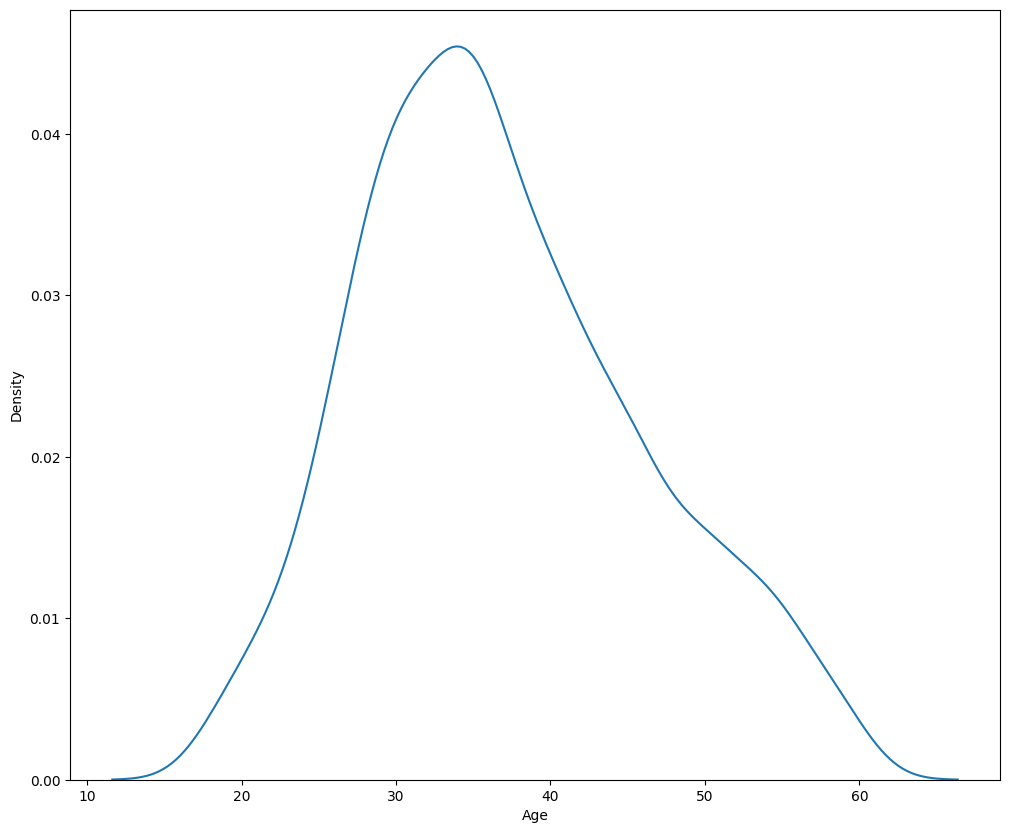

In [30]:
plt.figure(figsize=(12,10))
sns.distplot(df["Age"],hist =False)
plt.show

In [31]:
ordinal_feature =['Education','EnvironmentSatisfaction','JobSatisfaction','PerformanceRating','relationshipSatisfaction',"WorkLifeBalance"]

Text(0.5, 1.0, 'education W.R.T Attrition')

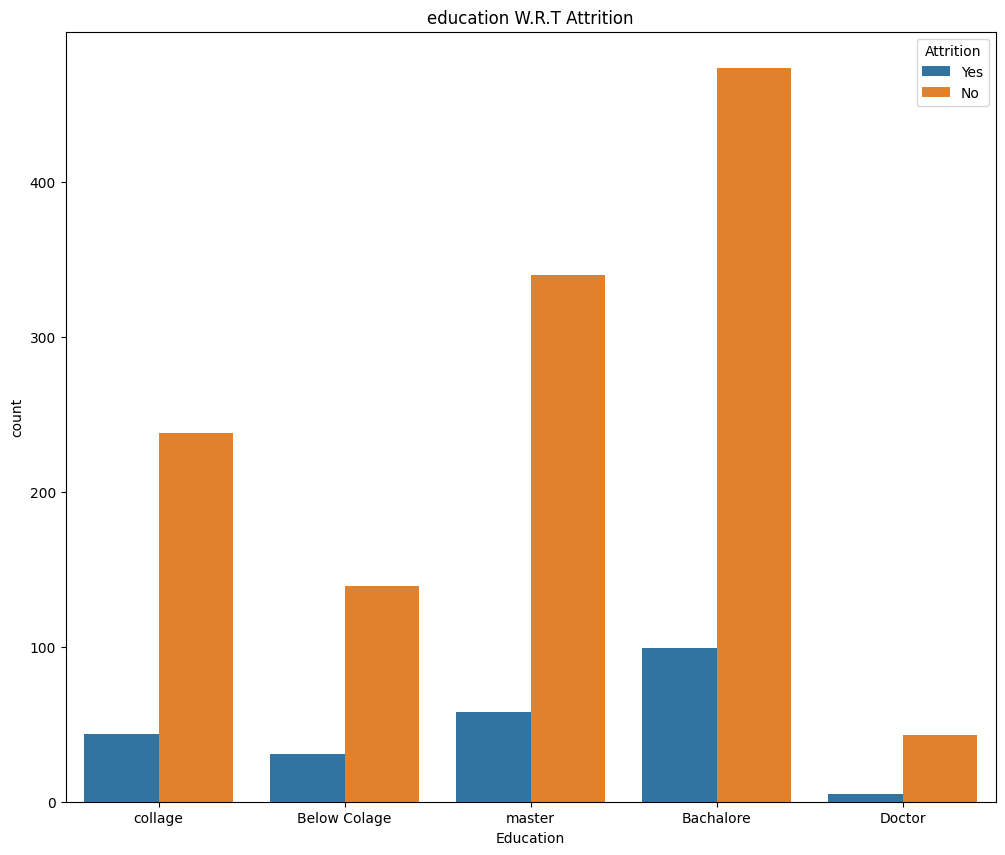

In [34]:
edu_map={1:'Below Colage',2:'collage',3: 'Bachalore',4:'master',5 :'Doctor'}
plt.figure(figsize=(12,10))
sns.countplot(x=df["Education"].map(edu_map),hue ="Attrition" ,data= df)
plt.title("education W.R.T Attrition")

Label Encoding

In [35]:
#Target variable

df['Attrition'] =df ['Attrition'].replace({'No':0,'Yes':1})

In [40]:
#Encode binary variables
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df["Gender"]= df['Gender'].map({'Male':0 ,'Female':1})

In [42]:
df['Over18']=df['Over18'].map({'N':0,'Y':1})

In [44]:
from sklearn.preprocessing import LabelEncoder

Encoding_cols =['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoder={}
for column in Encoding_cols:
  label_encoder[column] =LabelEncoder()
  df[column]=label_encoder[column].fit_transform(df[column])

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,count
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,1,NaN,11,3,1,80,0,8,0,1,6,4,0,5,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,1,NaN,23,4,4,80,1,10,3,3,10,7,1,7,5
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,1,NaN,15,3,2,80,0,7,3,3,0,0,0,0,5
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,1,NaN,11,3,3,80,0,8,3,3,8,7,3,0,5
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,1,NaN,12,3,4,80,1,6,3,3,2,2,2,2,5


In [46]:
df['Over18'].value_counts()


1    1470
Name: Over18, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [59]:
#Sliting the data into training into testing

X=df.drop(['Attrition','Over18'],axis =1)
y=df['Attrition']

In [60]:
#Spliting the data in a traing and testing

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test ,=train_test_split(X,y,test_size=0.2, random_state=50)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176,)
(294,)


Modeling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [53]:
l_r =LogisticRegression()

In [63]:
l_r.fit(X_train, y_train)

ValueError: ignored

In [64]:
prediction =l_r.predict(X_test)
cnf_matrix =confusion_matrix,(y_test,prediction)

ValueError: ignored